In [ ]:
#decision tree algorithm

used for non linear data set

#information gain
good question have high information gain

# Uncertainty = Entropy
Entropy is a number that tells us how mixed a group is.
If a group has all one class (all cats), entropy is low (zero!).
If it's half cats and half dogs, entropy is high (lots of confusion!).

# Gini Index
Entropy (before split) − Weighted average entropy (after split)
It’s the drop in confusion after splitting.
The higher the gain, the better the split!




In [1]:
#classification with deccisiontree classifier (digits data set)

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load data
digits = datasets.load_digits()
X = digits.data
y = digits.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

# Initialize and train classifier
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.5722222222222222


In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load data
digits = datasets.load_digits()
X = digits.data
y = digits.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

# Grid search for best DecisionTreeClassifier
params = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=72), param_grid=params, cv=5)
grid.fit(X_train, y_train)

# Best decision tree model
best_tree = grid.best_estimator_
tree_pred = best_tree.predict(X_test)
print("Best Decision Tree Parameters:", grid.best_params_)
print("Decision Tree Accuracy:", accuracy_score(y_test, tree_pred))

# Random Forest for comparison
rf_clf = RandomForestClassifier(n_estimators=100, random_state=72)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))


Best Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5}
Decision Tree Accuracy: 0.8694444444444445
Random Forest Accuracy: 0.9833333333333333


Mean Squared Error: 0.33
R² Score: 0.51


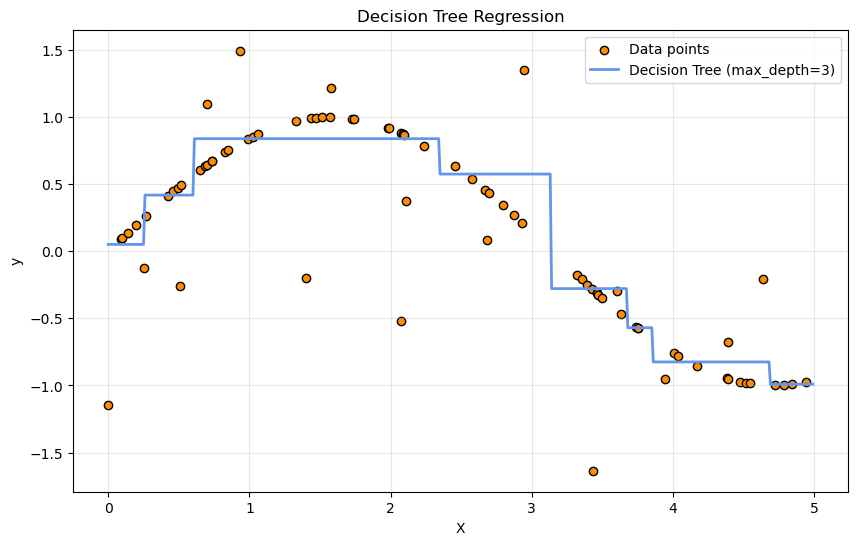

In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Create a synthetic dataset (sine curve with noise)
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))  # Add noise to every 5th sample

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create and train the decision tree regressor
regressor = DecisionTreeRegressor(max_depth=3, random_state=0)
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Create a smooth curve for visualization
X_grid = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_grid = regressor.predict(X_grid)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='darkorange', label='Data points', edgecolor='black')
plt.plot(X_grid, y_grid, color='cornflowerblue', label='Decision Tree (max_depth=3)', linewidth=2)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Decision Tree Regression')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


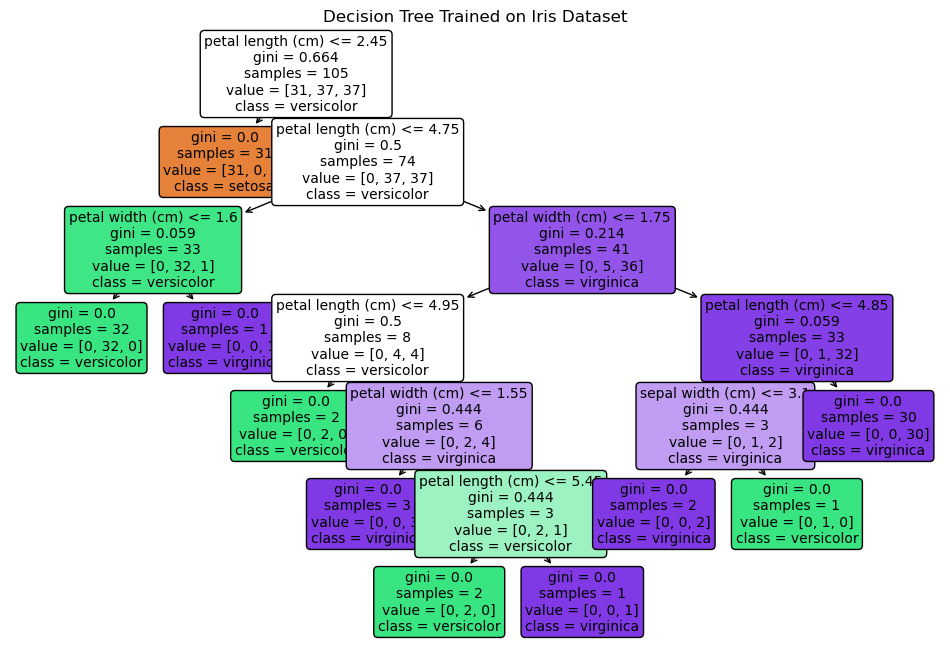

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(
    clf,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Trained on Iris Dataset")
plt.show()


In [7]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load data
digits = datasets.load_digits()
X = digits.data
y = digits.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

# Set up parameter grid for tuning
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced']
}

# Initialize GridSearchCV
clf = DecisionTreeClassifier(random_state=42)
grid = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

# Use the best estimator
best_clf = grid.best_estimator_
y_pred = best_clf.predict(X_test)
print("Best params:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))


Best params: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.8805555555555555


In [ ]:
#Task 1
 
Build a decision tree classifier without using libraries like sklearn.
Manually implement entropy/gini calculations, information gain, recursive tree construction, and prediction.

In [1]:
import numpy as np

class DecisionTree:
    def __init__(self, max_depth=2):
        self.max_depth = max_depth
        self.tree = None

    def entropy(self, y):
        p1 = np.mean(y)
        if p1 == 0 or p1 == 1:
            return 0.
        return -p1 * np.log2(p1) - (1 - p1) * np.log2(1 - p1)

    def _fit(self, X, y, depth):
        if depth == 0 or len(set(y)) == 1:
            return np.round(np.mean(y))
        n_samples, n_features = X.shape
        best_gain = 0
        best_split = None
        current_entropy = self.entropy(y)
        for i in range(n_features):
            left_idx = X[:, i] == 0
            right_idx = X[:, i] == 1
            if np.sum(left_idx) == 0 or np.sum(right_idx) == 0:
                continue
            left_entropy = self.entropy(y[left_idx])
            right_entropy = self.entropy(y[right_idx])
            weighted_entropy = (np.sum(left_idx) * left_entropy + np.sum(right_idx) * right_entropy) / n_samples
            info_gain = current_entropy - weighted_entropy
            if info_gain > best_gain:
                best_gain = info_gain
                best_split = i
        if best_split is None:
            return np.round(np.mean(y))
        left = self._fit(X[X[:, best_split] == 0], y[X[:, best_split] == 0], depth - 1)
        right = self._fit(X[X[:, best_split] == 1], y[X[:, best_split] == 1], depth - 1)
        return (best_split, left, right)

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        self.tree = self._fit(X, y, self.max_depth)

    def _predict(self, x, node):
        if not isinstance(node, tuple):
            return node
        index, left, right = node
        return self._predict(x, left if x[index] == 0 else right)

    def predict(self, X):
        return [self._predict(x, self.tree) for x in X]

# Example usage
X = [[1, 0, 1], [1, 1, 0], [0, 0, 1], [0, 0, 0], [0, 1, 1]]
y = [1, 1, 0, 0, 1]
dt = DecisionTree(max_depth=2)
dt.fit(X, y)
print(dt.predict([[1, 1, 1], [0, 0, 0]]))


[1.0, 0.0]


In [3]:
import math
from collections import Counter

class DecisionTreeNode:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value  # Only set for leaf nodes

    def is_leaf_node(self):
        return self.value is not None

class DecisionTreeClassifier:
    def __init__(self, min_samples_split=2, max_depth=100, criterion="entropy"):
        self.root = None
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.criterion = criterion  # 'entropy' or 'gini'

    def fit(self, X, y):
        self.n_classes_ = len(set(y))
        self.n_features_ = len(X[0])
        self.root = self._grow_tree(X, y)

    def _entropy(self, y):
        counts = Counter(y)
        probabilities = [v / len(y) for v in counts.values()]
        return -sum(p * math.log2(p) for p in probabilities if p > 0)

    def _gini(self, y):
        counts = Counter(y)
        probabilities = [v / len(y) for v in counts.values()]
        return 1 - sum(p ** 2 for p in probabilities)

    def _information_gain(self, y, left_y, right_y, criterion_func):
        parent_loss = criterion_func(y)
        n = len(y)
        n_left, n_right = len(left_y), len(right_y)
        weighted_loss = (n_left / n) * criterion_func(left_y) + (n_right / n) * criterion_func(right_y)
        return parent_loss - weighted_loss

    def _best_split(self, X, y):
        best_gain = -1
        split_idx, split_threshold = None, None
        criterion_func = self._entropy if self.criterion == "entropy" else self._gini

        for feature_index in range(self.n_features_):
            values = set(row[feature_index] for row in X)
            for threshold in values:
                left_y = [label for row, label in zip(X, y) if row[feature_index] <= threshold]
                right_y = [label for row, label in zip(X, y) if row[feature_index] > threshold]

                if not left_y or not right_y:
                    continue

                gain = self._information_gain(y, left_y, right_y, criterion_func)
                if gain > best_gain:
                    best_gain = gain
                    split_idx = feature_index
                    split_threshold = threshold

        return split_idx, split_threshold

    def _grow_tree(self, X, y, depth=0):
        num_samples = len(y)
        num_labels = len(set(y))

        if depth >= self.max_depth or num_labels == 1 or num_samples < self.min_samples_split:
            leaf_value = Counter(y).most_common(1)[0][0]
            return DecisionTreeNode(value=leaf_value)

        feature_idx, threshold = self._best_split(X, y)

        if feature_idx is None:
            leaf_value = Counter(y).most_common(1)[0][0]
            return DecisionTreeNode(value=leaf_value)

        left_indices = [i for i, row in enumerate(X) if row[feature_idx] <= threshold]
        right_indices = [i for i, row in enumerate(X) if row[feature_idx] > threshold]

        left = self._grow_tree([X[i] for i in left_indices], [y[i] for i in left_indices], depth + 1)
        right = self._grow_tree([X[i] for i in right_indices], [y[i] for i in right_indices], depth + 1)

        return DecisionTreeNode(feature=feature_idx, threshold=threshold, left=left, right=right)

    def predict(self, X):
        return [self._predict_one(x, self.root) for x in X]

    def _predict_one(self, x, node):
        while not node.is_leaf_node():
            if x[node.feature] <= node.threshold:
                node = node.left
            else:
                node = node.right
        return node.value

# Example usage:
if __name__ == "__main__":
    # Simple dataset: [feature1, feature2]
    X = [[2.7, 2.5],
         [1.3, 1.5],
         [3.5, 3.7],
         [3.0, 3.0],
         [1.0, 1.1],
         [1.2, 1.0]]
    y = [0, 0, 1, 1, 0, 0]

    tree = DecisionTreeClassifier(max_depth=3, criterion="entropy")
    tree.fit(X, y)
    predictions = tree.predict([[1.1, 1.0], [3.1, 3.0]])
    print("Predictions:", predictions)


Predictions: [0, 1]


In [3]:
import math
from collections import Counter

# --- Step 1: Entropy Function ---
def entropy(labels):
    total = len(labels)
    counts = Counter(labels)
    return -sum((count/total) * math.log2(count/total) for count in counts.values())

# --- Step 2: Information Gain ---
def info_gain(data, labels, feature_index):
    total_entropy = entropy(labels)
    subsets = {}
    for row, label in zip(data, labels):
        key = row[feature_index]
        if key not in subsets:
            subsets[key] = {'data': [], 'labels': []}
        subsets[key]['data'].append(row)
        subsets[key]['labels'].append(label)
    weighted_entropy = 0
    total = len(labels)
    for subset in subsets.values():
        weight = len(subset['labels']) / total
        weighted_entropy += weight * entropy(subset['labels'])
    return total_entropy - weighted_entropy

# --- Step 3: Tree Node ---
class DecisionTreeNode:
    def __init__(self, feature=None, value=None, label=None, children=None):
        self.feature = feature
        self.value = value
        self.label = label
        self.children = children if children is not None else {}

def majority_label(labels):
    return Counter(labels).most_common(1)[0][0]

def build_tree(data, labels, features):
    if len(set(labels)) == 1:
        return DecisionTreeNode(label=labels[0])
    if not features:
        return DecisionTreeNode(label=majority_label(labels))
    gains = [info_gain(data, labels, i) for i in features]
    best_index = features[gains.index(max(gains))]
    node = DecisionTreeNode(feature=best_index)
    values = set(row[best_index] for row in data)
    for val in values:
        subset_data = []
        subset_labels = []
        for row, label in zip(data, labels):
            if row[best_index] == val:
                subset_data.append(row)
                subset_labels.append(label)
        if not subset_data:
            node.children[val] = DecisionTreeNode(label=majority_label(labels))
        else:
            remaining_features = [f for f in features if f != best_index]
            node.children[val] = build_tree(subset_data, subset_labels, remaining_features)
    return node

# --- Step 4: Prediction ---
def predict(tree, row):
    if tree.label is not None:
        return tree.label
    value = row[tree.feature]
    if value in tree.children:
        return predict(tree.children[value], row)
    else:
        return None  # unseen value

# --- Example Dataset: Study Hours & Grades ---
# Features: [Hours_Studied, Grade] (both categorical for this simple demo)
data = [
    ['Low', 'C'],
    ['High', 'A'],
    ['Medium', 'B'],
    ['Low', 'D'],
    ['High', 'B'],
    ['Medium', 'C'],
    ['High', 'A'],
    ['Low', 'F'],
    ['Medium', 'B'],
    ['High', 'A'],
]
labels = ['Fail', 'Pass', 'Pass', 'Fail', 'Pass', 'Pass', 'Pass', 'Fail', 'Pass', 'Pass']

# Feature indices: 0 = Hours_Studied, 1 = Grade
features = [0, 1]

# --- Train the tree ---
tree = build_tree(data, labels, features)

# --- Predict new sample ---
sample = ['Medium', 'C']
print("Predicted class:", predict(tree, sample))


Predicted class: Pass
